In [1]:
import scanpy as sc

In [2]:
zebrafish = sc.read('/lustre/groups/ml01/workspace/alejandro.tejada/COLE/fullDataZebra.h5ad')

In [3]:
zebrafish

AnnData object with n_obs × n_vars = 2758961 × 32031
    obs: 'cell', 'Size_Factor', 'n.umi', 'perc_mitochondrial_umis', 'timepoint', 'Oligo', 'hash_umis', 'top_to_second_best_ratio', 'cell_type_sub', 'cell_type_broad', 'tissue', 'germ_layer', 'log.n.umi', 'num_genes_expressed', 'umap3d_1', 'umap3d_2', 'umap3d_3', 'all_clust', 'major_group', 'group_cluster', 'gene_target', 'mean_nn_time', 'subumap3d_1', 'subumap3d_2', 'subumap3d_3', 'sample', 'hash_plate', 'log.hash_umis'
    var: 'gene_short_name', 'id', 'chromosome', 'bp1', 'bp2', 'gene_strand', 'num_cells_expressed'
    obsm: 'X_aligned', 'X_pca', 'X_umap'

In [4]:
zebrafish.obs.cell_type_sub.value_counts()

cell_type_sub
periderm 10                                    166572
mature fast muscle 6                            99948
connective tissue-meninges-dermal FB (late)     84413
mature fast muscle 2                            77466
periderm 14                                     75727
                                                ...  
enveloping layer (EVL)                             46
periderm 15                                        22
intestine (late)                                   18
mineralized tissue, bone                            7
lens (other)                                        1
Name: count, Length: 151, dtype: int64

In [18]:
zebrafish.obs.gene_target.value_counts()

gene_target
ctrl-inj        362755
tfap2a          159388
tfap2a-foxd3    127151
epha4a          124704
egr2b           118306
foxd3           116702
ctrl-hgfa       116548
hgfa-mut        104690
noto-mut         87586
tbx1             87472
mafba-mut        84482
foxi1            81688
mafba            76095
zc4h2            73288
hand2            72216
egr2b-remove     71826
hoxb1a           71298
phox2a           71102
met-mut          66147
tbx16            61804
tbx16-msgn1      60289
tbx16-tbx16l     58023
noto             57847
smo              57625
cdx4             57611
ctrl-noto        49172
cdx4-cdx1a       48277
hgfa             44929
tbxta            39680
ctrl-met         38406
ctrl-mafba       34954
wnt3a-wnt8       34686
met              25735
ctrl-tbx16        9004
tbx16-mut         7475
Name: count, dtype: int64

It's weird, but after reading the paper and talking to the experimentalist, **explanation below:**

ctrl-inj is control. gene-mut denotes zebrafish born with a mutation in the gene (vs. F0 CRISPR-Cas9), and ctrl-gene is a fish with similar genetic background as gene-mut but without the mutation. gene indicates a knock out for that gene using F0 CRISPR, and two genes such as tbx16-msgn1 indicate a double gene KO.

We will treat all gene and gene-mut as the same phenotype as they were remarked to be similar in Saunders et al, and all ctrl-gene will be treated as control

In [21]:
def mapping(label):
    if label == 'ctrl-inj':
        ret = 'negative'
    elif 'ctrl' in label:
        ret = 'negative'
    elif 'mut' in label or 'remove' in label:
        ret = label.split('-')[0]
    elif '-' in label:
        return label.split('-')[0], label.split('-')[1]
    else:
        return label, 'negative'
    return ret, 'negative'

In [24]:
zebrafish.obs['gene1+gene2'] = [f'{mapping(x)[0]}+{mapping(x)[1]}' for x in zebrafish.obs.gene_target]

In [25]:
zebrafish.obs['gene1+gene2'].value_counts()

gene1+gene2
negative+negative    610839
egr2b+negative       190132
mafba+negative       160577
tfap2a+negative      159388
hgfa+negative        149619
noto+negative        145433
tfap2a+foxd3         127151
epha4a+negative      124704
foxd3+negative       116702
met+negative          91882
tbx1+negative         87472
foxi1+negative        81688
zc4h2+negative        73288
hand2+negative        72216
hoxb1a+negative       71298
phox2a+negative       71102
tbx16+negative        69279
tbx16+msgn1           60289
tbx16+tbx16l          58023
smo+negative          57625
cdx4+negative         57611
cdx4+cdx1a            48277
tbxta+negative        39680
wnt3a+wnt8            34686
Name: count, dtype: int64

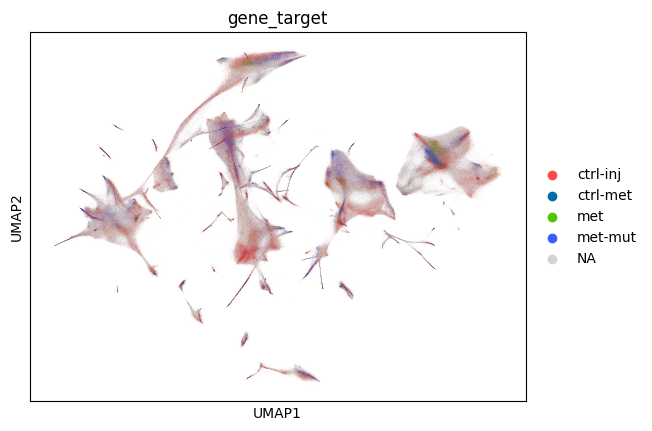

In [26]:
sc.pl.umap(zebrafish, color='gene_target', groups=['ctrl-inj', 'met', 'ctrl-met', 'met-mut'])

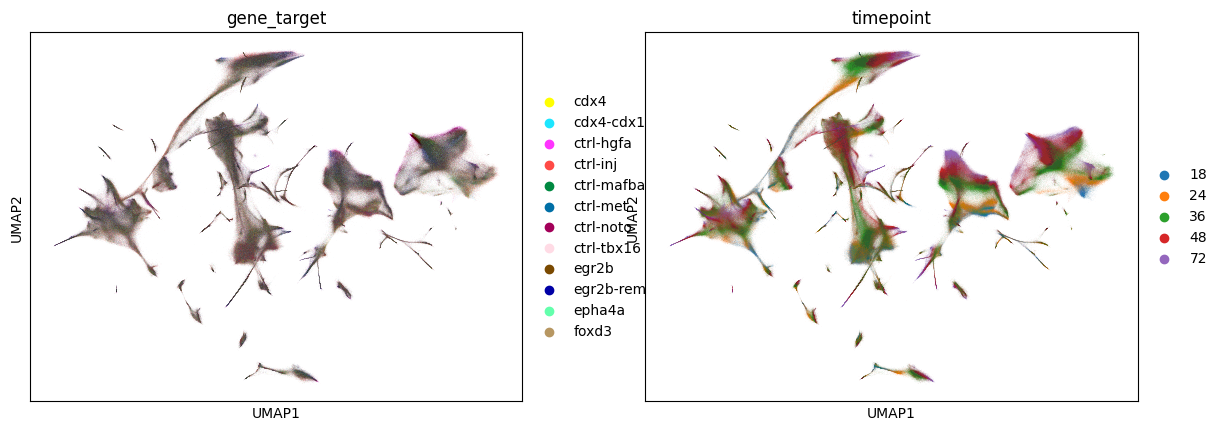

In [20]:
sc.pl.umap(zebrafish, color=['gene_target', 'timepoint'])

The .X already contains count data.

In [39]:
sc.pp.normalize_total(zebrafish)
sc.pp.log1p(zebrafish)

In [40]:
sc.pp.highly_variable_genes(zebrafish, inplace=True, n_top_genes=2000)

In [42]:
zebrafish = zebrafish[:,zebrafish.var["highly_variable"]==True]

In [43]:
zebrafish

View of AnnData object with n_obs × n_vars = 2758961 × 2000
    obs: 'cell', 'Size_Factor', 'n.umi', 'perc_mitochondrial_umis', 'timepoint', 'Oligo', 'hash_umis', 'top_to_second_best_ratio', 'cell_type_sub', 'cell_type_broad', 'tissue', 'germ_layer', 'log.n.umi', 'num_genes_expressed', 'umap3d_1', 'umap3d_2', 'umap3d_3', 'all_clust', 'major_group', 'group_cluster', 'gene_target', 'mean_nn_time', 'subumap3d_1', 'subumap3d_2', 'subumap3d_3', 'sample', 'hash_plate', 'log.hash_umis', 'gene1+gene2'
    var: 'gene_short_name', 'id', 'chromosome', 'bp1', 'bp2', 'gene_strand', 'num_cells_expressed', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'timepoint_colors', 'sample_colors', 'gene_target_colors', 'log1p', 'hvg'
    obsm: 'X_aligned', 'X_pca', 'X_umap'

In [46]:
zebrafish

View of AnnData object with n_obs × n_vars = 2758961 × 2000
    obs: 'cell', 'Size_Factor', 'n.umi', 'perc_mitochondrial_umis', 'timepoint', 'Oligo', 'hash_umis', 'top_to_second_best_ratio', 'cell_type_sub', 'cell_type_broad', 'tissue', 'germ_layer', 'log.n.umi', 'num_genes_expressed', 'umap3d_1', 'umap3d_2', 'umap3d_3', 'all_clust', 'major_group', 'group_cluster', 'gene_target', 'mean_nn_time', 'subumap3d_1', 'subumap3d_2', 'subumap3d_3', 'sample', 'hash_plate', 'log.hash_umis', 'gene1+gene2'
    var: 'gene_short_name', 'id', 'chromosome', 'bp1', 'bp2', 'gene_strand', 'num_cells_expressed', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'timepoint_colors', 'sample_colors', 'gene_target_colors', 'log1p', 'hvg'
    obsm: 'X_aligned', 'X_pca', 'X_umap'

In [50]:
zebrafish.obs['gene1+gene2']

A03_B01_P01-A01_LIG104    negative+negative
A03_B01_P01-A02_LIG101    negative+negative
A03_B01_P01-A02_LIG127    negative+negative
A03_B01_P01-A02_LIG257    negative+negative
A03_B01_P01-A03_LIG201    negative+negative
                                ...        
H07_D12_P04-H12_LIG258       mafba+negative
H07_D12_P04-H12_LIG264      tfap2a+negative
H07_D12_P04-H12_LIG302       mafba+negative
H07_D12_P04-H12_LIG370       foxd3+negative
H07_D12_P04-H12_LIG6        tfap2a+negative
Name: gene1+gene2, Length: 2758961, dtype: category
Categories (24, object): ['cdx4+cdx1a', 'cdx4+negative', 'egr2b+negative', 'epha4a+negative', ..., 'tfap2a+foxd3', 'tfap2a+negative', 'wnt3a+wnt8', 'zc4h2+negative']

In [51]:
zebrafish.obs[['gene1', 'gene2']] = zebrafish.obs['gene1+gene2'].str.split('+', expand=True)


/tmp/ipykernel_283125/2187450260.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  zebrafish.obs[['gene1', 'gene2']] = zebrafish.obs['gene1+gene2'].str.split('+', expand=True)


In [52]:
zebrafish.obs

,cell,Size_Factor,n.umi,perc_mitochondrial_umis,timepoint,Oligo,hash_umis,top_to_second_best_ratio,cell_type_sub,cell_type_broad,...,mean_nn_time,subumap3d_1,subumap3d_2,subumap3d_3,sample,hash_plate,log.hash_umis,gene1+gene2,gene1,gene2
A03_B01_P01-A01_LIG104,A03_B01_P01-A01_LIG104,0.766072,348.0,4.022989,18,18h_ctrl-inj_P13_H1,29.0,25.803177,head mesenchyme/PA cartilage,head mesenchyme/PA cartilage,...,22.000000,4.793726,-1.605781,-4.725532,1,NA,NaN,negative+negative,negative,negative
A03_B01_P01-A02_LIG101,A03_B01_P01-A02_LIG101,1.001617,455.0,9.010989,72,72h_ctrl-inj_P10_A6,46.0,5.384193,intestine (mid),intestine,...,72.000000,-8.592424,4.106266,1.090345,1,NA,NaN,negative+negative,negative,negative
A03_B01_P01-A02_LIG127,A03_B01_P01-A02_LIG127,2.007637,912.0,1.644737,36,36h_ctrl-inj_P7_A8,15.0,9.082616,basal cell (early),basal cell,...,44.266667,2.031515,0.302222,-2.180131,1,NA,NaN,negative+negative,negative,negative
A03_B01_P01-A02_LIG257,A03_B01_P01-A02_LIG257,0.468889,213.0,0.938967,18,18h_ctrl-noto_P3_D7,24.0,21.347128,neural progenitor (hindbrain R7/8),neural progenitor (hindbrain R7/8),...,26.800000,2.349970,-5.287926,1.674627,1,NA,NaN,negative+negative,negative,negative
A03_B01_P01-A03_LIG201,A03_B01_P01-A03_LIG201,0.537131,244.0,0.409836,48,48h_ctrl-noto_P16_H9,10.0,6.059433,"neurons (differentiating, contains peripheral)","neurons (differentiating, contains peripheral)",...,43.230769,0.662950,2.123819,3.496207,1,NA,NaN,negative+negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H07_D12_P04-H12_LIG258,H07_D12_P04-H12_LIG258,0.911361,414.0,1.932367,24,24h_mafba-mut_P9_A6,99.0,11.482214,neural progenitor (hindbrain R7/8),neural progenitor (hindbrain R7/8),...,25.846154,1.630804,-5.753800,1.452163,2,P9,1.995635,mafba+negative,mafba,negative
H07_D12_P04-H12_LIG264,H07_D12_P04-H12_LIG264,0.482097,219.0,2.283105,72,72h_tfap2a_P10_H4,8.0,inf,"neuron (telencephalon, glutamatergic)","neuron (telencephalon, glutamatergic)",...,81.600000,-0.801760,6.784749,0.902189,2,P10,0.903090,tfap2a+negative,tfap2a,negative
H07_D12_P04-H12_LIG302,H07_D12_P04-H12_LIG302,1.472707,669.0,13.751868,36,36h_mafba-mut_P9_F11,14.0,inf,mature fast muscle 2,mature fast muscle,...,38.400000,-3.097248,-2.197718,4.776149,2,P9,1.146128,mafba+negative,mafba,negative
H07_D12_P04-H12_LIG370,H07_D12_P04-H12_LIG370,2.652634,1205.0,19.668050,48,48h_foxd3_P3_G4,217.0,116.194002,periderm 14,periderm,...,46.666667,-3.194327,-0.029608,-0.283952,2,P3,2.336460,foxd3+negative,foxd3,negative
